# 模板匹配策略
1. cv.TM_CCOEFF：相关性系数匹配方法，使用乘积相关性来进行匹配。
2. cv.TM_CCOEFF_NORMED：归一化相关性系数匹配方法，对相关性系数进行归一化处理。
3. cv.TM_CCORR：相关匹配方法，使用乘积相关性来进行匹配。
4. cv.TM_CCORR_NORMED：归一化相关匹配方法，对相关性进行归一化处理。
5. cv.TM_SQDIFF：平方差匹配方法，使用平方差来进行匹配。
6. cv.TM_SQDIFF_NORMED：归一化平方差匹配方法，对平方差进行归一化处理。

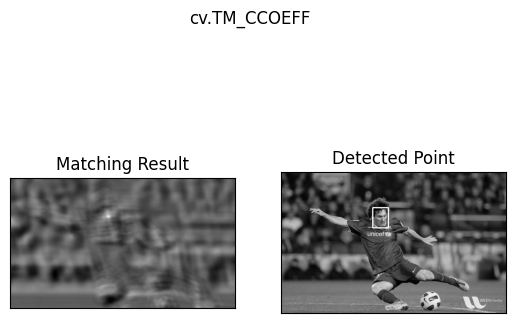

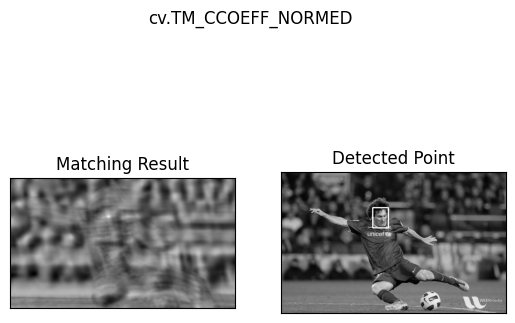

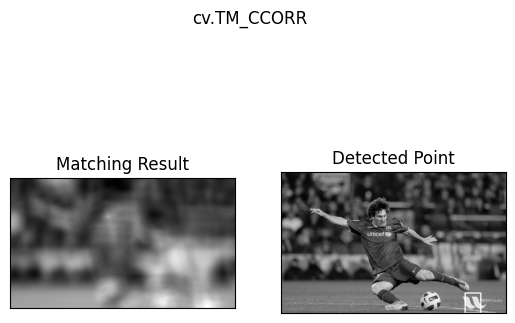

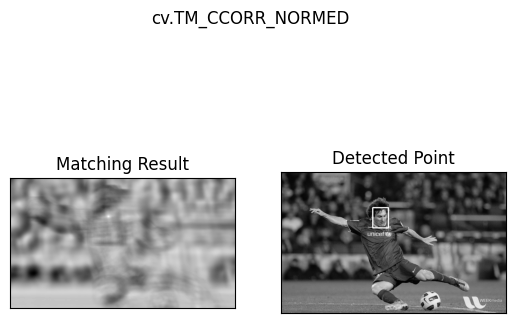

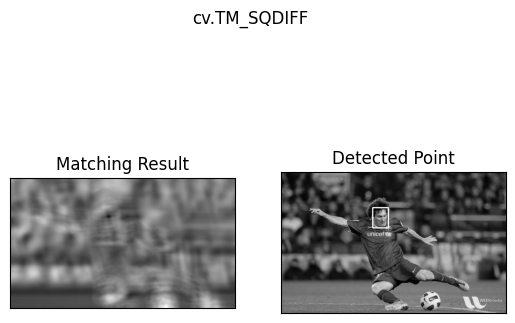

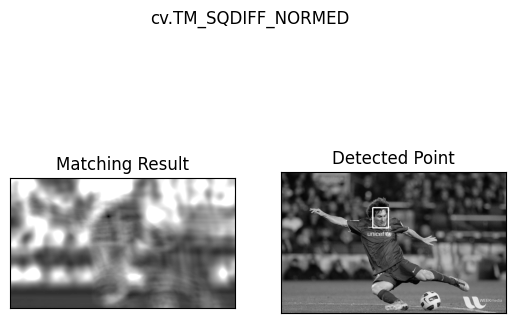

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 读取输入图像和模板图像
img = cv.imread('../data/messi5.jpg', 0)
img2 = img.copy()
template = cv.imread('../data/messi5_template.jpg', 0)
# 将模板图像的形状信息由 (行数, 列数) 转换为 (列数, 行数)，并将其赋值给 w 和 h 变量。
w, h = template.shape[::-1]

# 列表中包含了6种比较方法的名称
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    
    # 将方法名称转换为对应的方法常量
    method = eval(meth)
    
    # 应用模板匹配
    res = cv.matchTemplate(img, template, method)
    
    #如果当前的方法是 cv.TM_SQDIFF 或 cv.TM_SQDIFF_NORMED，
    # 它们属于平方差匹配方法，意味着匹配结果的最小值表示最佳匹配。
    # 因此，我们选择 min_loc 作为左上角位置，即最小值位置

    # 根据方法选择匹配结果的最大值或最小值
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc  # 对于TM_SQDIFF和TM_SQDIFF_NORMED，取最小值位置
    else:
        top_left = max_loc  # 对于其他方法，取最大值位置
    
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # 在原图像上绘制矩形框来标识匹配区域
    cv.rectangle(img, top_left, bottom_right, 255, 2)
    
    # 显示匹配结果和检测到的点
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)  # 使用方法名称作为标题
    plt.show()


In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('../data/rect.png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('../data/rect_template.png',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv.imshow('img_total',img_rgb)
cv.waitKey(0)
cv.destroyAllWindows()

